In [10]:
# ml lab - 2
# exercise q - 3
# Babyrani Waikhom - CH.SC.U4CSE23008

First 5 rows:
    Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Co

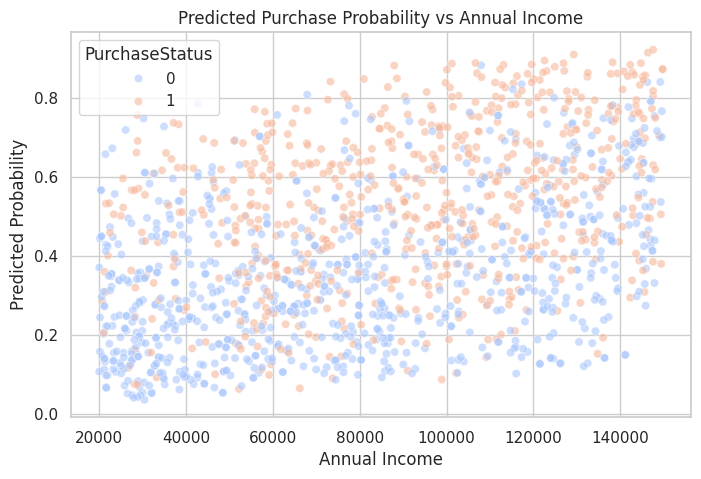

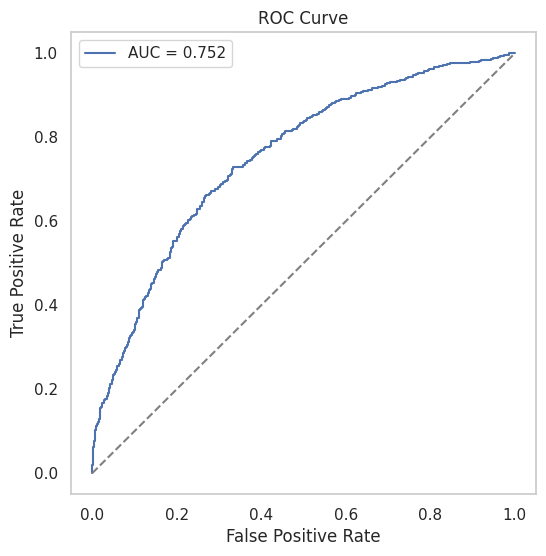

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Load the dataset
df = pd.read_csv("Purchase_Behaviour.csv")

# Basic inspection
print("First 5 rows:\n", df.head())
print("\nData Info:\n")
print(df.info())

# Drop missing values for simplicity
df = df.dropna()

# Encode categorical variables if needed
# Assuming 'Gender' needs encoding, and it's currently int64 based on df.info()
# If 'Gender' contains 'Male'/'Female' strings, the previous mapping was correct.
# Based on df.head() output showing 1s and 0s, it seems already encoded.
# If it was string 'Male'/'Female', the line below would be needed:
# df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


# Define features and target
# Correcting column names to match the dataset
feature_cols = ['Age', 'Gender', 'AnnualIncome', 'TimeSpentOnWebsite']
X = df[feature_cols]
y = df['PurchaseStatus'] # Correct target column

# Add constant term for intercept
X_const = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X_const).fit()
print("\nModel Summary:\n")
print(model.summary())

# Make predictions
df['pred_prob'] = model.predict(X_const)
df['pred_label'] = (df['pred_prob'] >= 0.5).astype(int)

# Evaluate model
accuracy = (df['pred_label'] == y).mean()
print(f"\nAccuracy: {accuracy:.3f}")

# Visualize predicted probability vs Annual Income
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='AnnualIncome', # Correct column name
    y='pred_prob',
    hue='PurchaseStatus', # Correct column name for hue
    palette='coolwarm',
    alpha=0.6
)
plt.title("Predicted Purchase Probability vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Predicted Probability")
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y, df['pred_prob'])
auc = roc_auc_score(y, df['pred_prob'])

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()